# Spatial Domain to Frequency Domain

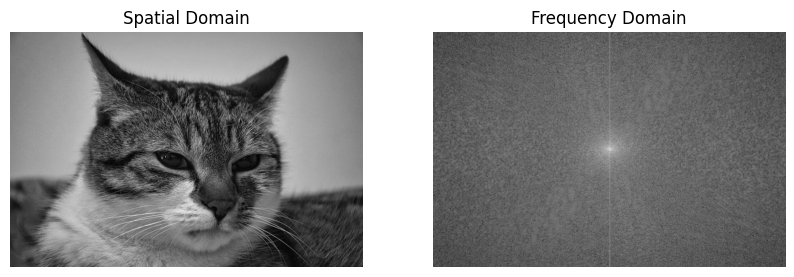

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('images/cat.jpg', cv2.IMREAD_GRAYSCALE)
                 
# Compute the Fourier Transform
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the DC (zero frequency component) to center
dft_shift = np.fft.fftshift(dft)

# Calculate the intensity: Magnitude of each complex number
# 1 added to avoid log(0)
# log used to scale down large values
magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Normalizing intensities from 0 to 255
magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)

# Plotting the figures
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Spatial Domain")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Domain')
plt.axis('off')

plt.show()